# Metrix calculation and Distribution confirmation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from rouge import Rouge

## LSTM_Greedy

In [2]:
df_lstm_g = pd.read_csv("LSTM_Validation_Result.csv", encoding='utf-8')
df_lstm_g.head()

,img_id,img_path,real_caption,predicted_caption,bleu_1,bleu_2,bleu_3,bleu_4
0,1,/content/drive/MyDrive/BT5153/Data/Pict/1.jpg,ss light and cool shorts are perfect for relax...,a pair of knit shorts featuring a high rise wa...,0.091116,0.100192,0.105883,0.085547
1,6,/content/drive/MyDrive/BT5153/Data/Pict/6.jpg,ss chic shorts with clean lines and a sleek cu...,a pair of denim shorts featuring a high rise w...,0.039011,0.018105,0.024710,0.021283
2,15,/content/drive/MyDrive/BT5153/Data/Pict/15.jpg,ss these relaxed pants are soft and comfortabl...,a pair of knit shorts featuring a high rise wa...,0.107354,0.166944,0.202661,0.169511
3,18,/content/drive/MyDrive/BT5153/Data/Pict/18.jpg,ss comfortable versatile shorts perfect for we...,a pair of knit shorts featuring a high rise wa...,0.090937,0.115465,0.129250,0.105938
4,25,/content/drive/MyDrive/BT5153/Data/Pict/25.jpg,ss incredible functionality and stylish design...,a knit tee featuring a front graphic of the te...,0.017477,0.062090,0.101805,0.092585


In [4]:
rouge_scores = ["rouge-1_f","rouge-1_p","rouge-1_r","rouge-2_f","rouge-2_p","rouge-2_r","rouge-l_f","rouge-l_p","rouge-l_r"]
for i in range(len(rouge_scores)):
    df_lstm_g[rouge_scores[i]] = -1
    
rouge = Rouge()

for i in range(len(df_lstm_g)):
    reference = df_lstm_g["real_caption"].values[i]
    model_out = df_lstm_g["predicted_caption"].values[i]

    score = rouge.get_scores(model_out, reference)
    
    df_lstm_g.iloc[i,-9] = score[0]['rouge-1']['f']
    df_lstm_g.iloc[i,-8] = score[0]['rouge-1']['p']
    df_lstm_g.iloc[i,-7] = score[0]['rouge-1']['r']
    df_lstm_g.iloc[i,-6] = score[0]['rouge-2']['f']
    df_lstm_g.iloc[i,-5] = score[0]['rouge-2']['p']
    df_lstm_g.iloc[i,-4] = score[0]['rouge-2']['r']
    df_lstm_g.iloc[i,-3] = score[0]['rouge-l']['f']
    df_lstm_g.iloc[i,-2] = score[0]['rouge-l']['p']
    df_lstm_g.iloc[i,-1] = score[0]['rouge-l']['r']

In [5]:
df_lstm_g.iloc[:,-13:].describe()

,bleu_1,bleu_2,bleu_3,bleu_4,rouge-1_f,rouge-1_p,rouge-1_r,rouge-2_f,rouge-2_p,rouge-2_r,rouge-l_f,rouge-l_p,rouge-l_r
count,3736.000000,3736.000000,3736.000000,3736.000000,3736.000000,3736.000000,3736.000000,3736.000000,3736.000000,3736.000000,3736.000000,3736.000000,3736.000000
mean,0.146786,0.125663,0.136059,0.111887,0.211257,0.317327,0.173623,0.064659,0.091549,0.053724,0.194408,0.324197,0.144910
std,0.147318,0.111013,0.105051,0.084387,0.154194,0.210281,0.134554,0.104712,0.140885,0.089385,0.143711,0.204864,0.115923
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.035674,0.032283,0.038430,0.031763,0.096677,0.153846,0.071429,0.000000,0.000000,0.000000,0.083333,0.181818,0.058824
50%,0.096774,0.110762,0.132688,0.111522,0.166667,0.290323,0.131579,0.000000,0.000000,0.000000,0.148148,0.272727,0.108108
75%,0.212112,0.183195,0.209914,0.173595,0.296296,0.461538,0.250000,0.080408,0.125000,0.066667,0.273173,0.444444,0.200000
max,0.833333,0.778499,0.738244,0.634047,0.833333,1.000000,0.833333,0.727273,0.909091,0.727273,0.857143,1.000000,0.818182


In [7]:
print("Unique Caption:{}".format(df_lstm_g['predicted_caption'].nunique()))
print("Unique Caption Rate:{}".format(df_lstm_g['predicted_caption'].nunique()/len(df_lstm_g)))

Unique Caption:74
Unique Caption Rate:0.01980728051391863


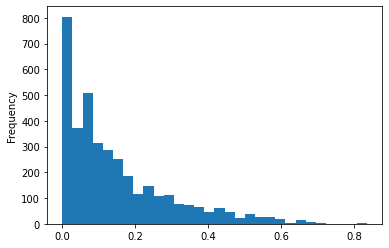

In [8]:
df_lstm_g['bleu_1'].plot.hist(bins=30);

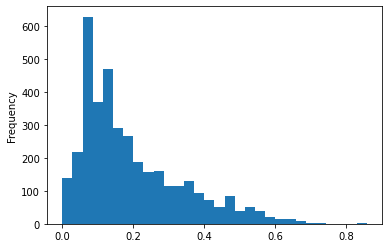

In [9]:
df_lstm_g['rouge-l_f'].plot.hist(bins=30);

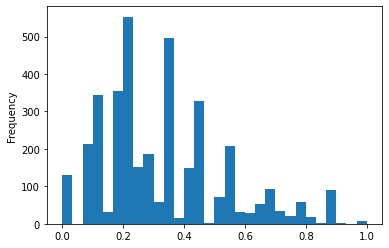

In [10]:
df_lstm_g['rouge-l_p'].plot.hist(bins=30);

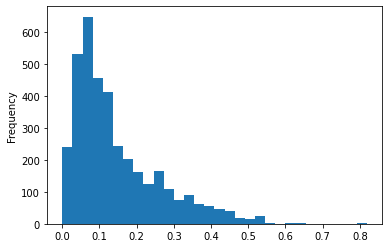

In [11]:
df_lstm_g['rouge-l_r'].plot.hist(bins=30);

In [12]:
df_lstm_g

,img_id,img_path,real_caption,predicted_caption,bleu_1,bleu_2,bleu_3,bleu_4,rouge-1_f,rouge-1_p,rouge-1_r,rouge-2_f,rouge-2_p,rouge-2_r,rouge-l_f,rouge-l_p,rouge-l_r
0,1,/content/drive/MyDrive/BT5153/Data/Pict/1.jpg,ss light and cool shorts are perfect for relax...,a pair of knit shorts featuring a high rise wa...,0.091116,0.100192,0.105883,0.085547,0.173913,0.285714,0.125000,0.000000,0.000000,0.000000,0.142857,0.250000,0.100000
1,6,/content/drive/MyDrive/BT5153/Data/Pict/6.jpg,ss chic shorts with clean lines and a sleek cu...,a pair of denim shorts featuring a high rise w...,0.039011,0.018105,0.024710,0.021283,0.163934,0.357143,0.106383,0.033898,0.076923,0.021739,0.076923,0.166667,0.050000
2,15,/content/drive/MyDrive/BT5153/Data/Pict/15.jpg,ss these relaxed pants are soft and comfortabl...,a pair of knit shorts featuring a high rise wa...,0.107354,0.166944,0.202661,0.169511,0.117647,0.142857,0.100000,0.000000,0.000000,0.000000,0.129032,0.166667,0.105263
3,18,/content/drive/MyDrive/BT5153/Data/Pict/18.jpg,ss comfortable versatile shorts perfect for we...,a pair of knit shorts featuring a high rise wa...,0.090937,0.115465,0.129250,0.105938,0.142857,0.214286,0.107143,0.000000,0.000000,0.000000,0.153846,0.250000,0.111111
4,25,/content/drive/MyDrive/BT5153/Data/Pict/25.jpg,ss incredible functionality and stylish design...,a knit tee featuring a front graphic of the te...,0.017477,0.062090,0.101805,0.092585,0.024096,0.032258,0.019231,0.000000,0.000000,0.000000,0.037736,0.111111,0.022727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3731,34569,/content/drive/MyDrive/BT5153/Data/Pict/34569.jpg,ss cut with a slim fit for a flattering silhou...,a knit tee featuring a crew neck long sleeves ...,0.131908,0.195824,0.234118,0.194875,0.133333,0.153846,0.117647,0.000000,0.000000,0.000000,0.080000,0.111111,0.062500
3732,34587,/content/drive/MyDrive/BT5153/Data/Pict/34587.jpg,ss it is called perfect for a reason features ...,a knit tee featuring a crew neck long sleeves ...,0.076923,0.161497,0.221789,0.191123,0.074074,0.076923,0.071429,0.000000,0.000000,0.000000,0.086957,0.111111,0.071429
3733,34594,/content/drive/MyDrive/BT5153/Data/Pict/34594.jpg,ss a crewneck sweater with a vintage fit dropp...,a knit tee featuring a crew neck long sleeves ...,0.284911,0.299080,0.311280,0.250277,0.275862,0.307692,0.250000,0.000000,0.000000,0.000000,0.173913,0.222222,0.142857
3734,34597,/content/drive/MyDrive/BT5153/Data/Pict/34597.jpg,ss sportswear style and casual comfort togethe...,a knit tee featuring a crew neck long sleeves ...,0.122142,0.181325,0.216784,0.180447,0.129032,0.153846,0.111111,0.000000,0.000000,0.000000,0.148148,0.222222,0.111111


## Transformer1_Greedy

In [13]:
df_tf1_g = pd.read_csv("Transformer1_Validation_Result.csv", encoding='utf-8')
df_tf1_g.head()

,img_path,real_caption,predicted_caption,bleu_1,bleu_2,bleu_3,bleu_4,img_id
0,/content/drive/MyDrive/BT5153/Data/Pict/6678.jpg,the wow factor for formal events this blouse b...,this clockhouse jacket is a casual and comfort...,0.083333,0.166330,0.224683,0.192591,6678
1,/content/drive/MyDrive/BT5153/Data/Pict/2442.jpg,as the sun rises on nashville scs inaugural se...,the brand sportswear t shirt is made from soft...,0.072101,0.072989,0.074017,0.059334,2442
2,/content/drive/MyDrive/BT5153/Data/Pict/12062.jpg,a pair of woven skinny pants featuring a gingh...,a pair of woven pants featuring a high rise wa...,0.433236,0.317908,0.271584,0.170496,12062
3,/content/drive/MyDrive/BT5153/Data/Pict/11127.jpg,a faux shearling zip up hoodie featuring a dra...,a knit top featuring a v neckline and long sle...,0.329287,0.200398,0.195352,0.153880,11127
4,/content/drive/MyDrive/BT5153/Data/Pict/2400.jpg,welcome to the dawn of a new soccer era for it...,the brand sportswear t shirt is made from soft...,0.031459,0.034886,0.036691,0.029682,2400


In [14]:
rouge_scores = ["rouge-1_f","rouge-1_p","rouge-1_r","rouge-2_f","rouge-2_p","rouge-2_r","rouge-l_f","rouge-l_p","rouge-l_r"]
for i in range(len(rouge_scores)):
    df_tf1_g[rouge_scores[i]] = -1
    
rouge = Rouge()

for i in range(len(df_tf1_g)):
    reference = df_tf1_g["real_caption"].values[i]
    model_out = df_tf1_g["predicted_caption"].values[i]

    score = rouge.get_scores(model_out, reference)
    
    df_tf1_g.iloc[i,-9] = score[0]['rouge-1']['f']
    df_tf1_g.iloc[i,-8] = score[0]['rouge-1']['p']
    df_tf1_g.iloc[i,-7] = score[0]['rouge-1']['r']
    df_tf1_g.iloc[i,-6] = score[0]['rouge-2']['f']
    df_tf1_g.iloc[i,-5] = score[0]['rouge-2']['p']
    df_tf1_g.iloc[i,-4] = score[0]['rouge-2']['r']
    df_tf1_g.iloc[i,-3] = score[0]['rouge-l']['f']
    df_tf1_g.iloc[i,-2] = score[0]['rouge-l']['p']
    df_tf1_g.iloc[i,-1] = score[0]['rouge-l']['r']

In [15]:
pd.concat([df_tf1_g.iloc[:,3:6],df_tf1_g.iloc[:,-9:]]).describe()

,bleu_1,bleu_2,bleu_3,rouge-1_f,rouge-1_p,rouge-1_r,rouge-2_f,rouge-2_p,rouge-2_r,rouge-l_f,rouge-l_p,rouge-l_r
count,3736.000000,3736.000000,3736.000000,3736.000000,3736.000000,3736.000000,3736.000000,3736.000000,3736.000000,3736.000000,3736.000000,3736.000000
mean,0.200633,0.150575,0.153495,0.290650,0.395570,0.244838,0.093128,0.123892,0.078912,0.256692,0.381391,0.201899
std,0.150339,0.111249,0.099158,0.157113,0.195283,0.146902,0.113049,0.143371,0.100370,0.149273,0.198700,0.128854
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.074325,0.060770,0.068821,0.169492,0.250000,0.129032,0.000000,0.000000,0.000000,0.142857,0.222222,0.100000
50%,0.172618,0.133060,0.152732,0.255319,0.363636,0.210526,0.057143,0.076923,0.045455,0.222222,0.333333,0.166667
75%,0.291266,0.218218,0.217243,0.391517,0.533333,0.333333,0.142857,0.200000,0.117647,0.347826,0.500000,0.277778
max,0.818731,0.717137,0.674186,0.909091,1.000000,0.857143,0.666667,0.888889,0.692308,0.842105,1.000000,0.818182


In [17]:
print("Unique Caption:{}".format(df_tf1_g['predicted_caption'].nunique()))
print("Unique Caption Rate:{}".format(df_tf1_g['predicted_caption'].nunique()/len(df_tf1_g)))

Unique Caption:367
Unique Caption Rate:0.09823340471092078


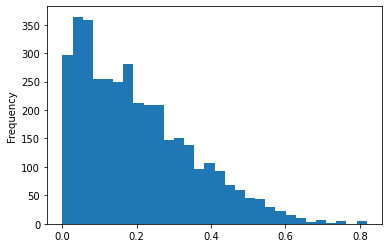

In [18]:
df_tf1_g['bleu_1'].plot.hist(bins=30);

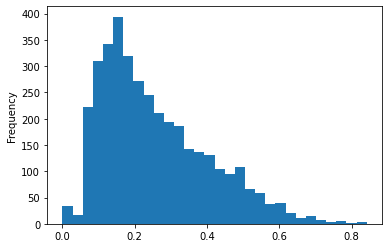

In [19]:
df_tf1_g['rouge-l_f'].plot.hist(bins=30);

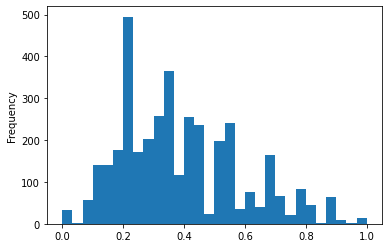

In [20]:
df_tf1_g['rouge-l_p'].plot.hist(bins=30);

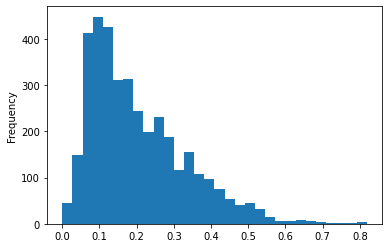

In [21]:
df_tf1_g['rouge-l_r'].plot.hist(bins=30);

In [22]:
df_tf1_g

,img_path,real_caption,predicted_caption,bleu_1,bleu_2,bleu_3,bleu_4,img_id,rouge-1_f,rouge-1_p,rouge-1_r,rouge-2_f,rouge-2_p,rouge-2_r,rouge-l_f,rouge-l_p,rouge-l_r
0,/content/drive/MyDrive/BT5153/Data/Pict/6678.jpg,the wow factor for formal events this blouse b...,this clockhouse jacket is a casual and comfort...,0.083333,0.166330,0.224683,0.192591,6678,0.083333,0.083333,0.083333,0.000000,0.000000,0.000000,0.100000,0.125000,0.083333
1,/content/drive/MyDrive/BT5153/Data/Pict/2442.jpg,as the sun rises on nashville scs inaugural se...,the brand sportswear t shirt is made from soft...,0.072101,0.072989,0.074017,0.059334,2442,0.196721,0.352941,0.136364,0.000000,0.000000,0.000000,0.185185,0.357143,0.125000
2,/content/drive/MyDrive/BT5153/Data/Pict/12062.jpg,a pair of woven skinny pants featuring a gingh...,a pair of woven pants featuring a high rise wa...,0.433236,0.317908,0.271584,0.170496,12062,0.571429,0.714286,0.476190,0.303030,0.384615,0.250000,0.500000,0.700000,0.388889
3,/content/drive/MyDrive/BT5153/Data/Pict/11127.jpg,a faux shearling zip up hoodie featuring a dra...,a knit top featuring a v neckline and long sle...,0.329287,0.200398,0.195352,0.153880,11127,0.461538,0.600000,0.375000,0.166667,0.222222,0.133333,0.333333,0.444444,0.266667
4,/content/drive/MyDrive/BT5153/Data/Pict/2400.jpg,welcome to the dawn of a new soccer era for it...,the brand sportswear t shirt is made from soft...,0.031459,0.034886,0.036691,0.029682,2400,0.138889,0.294118,0.090909,0.000000,0.000000,0.000000,0.133333,0.285714,0.086957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3731,/content/drive/MyDrive/BT5153/Data/Pict/30639.jpg,flattering and easy to wear listte is the wrap...,this flowy jersey dress with a floral pattern ...,0.129800,0.183195,0.215429,0.178369,30639,0.148148,0.166667,0.133333,0.000000,0.000000,0.000000,0.083333,0.111111,0.066667
3732,/content/drive/MyDrive/BT5153/Data/Pict/4550.jpg,crafted from stretchy wool blend fabric these ...,these slim fit jeans are a cool piece for the ...,0.165468,0.228231,0.262578,0.217078,4550,0.176471,0.187500,0.166667,0.000000,0.000000,0.000000,0.181818,0.200000,0.166667
3733,/content/drive/MyDrive/BT5153/Data/Pict/18994.jpg,bomber jacket in sturdy jersey with a small st...,pocket ankle length jeans in washed stretch de...,0.266018,0.095777,0.163347,0.149890,18994,0.275862,0.285714,0.266667,0.035714,0.037037,0.034483,0.200000,0.200000,0.200000
3734,/content/drive/MyDrive/BT5153/Data/Pict/5065.jpg,mickey mouse radiates from this t shirt as a s...,this clockhouse t shirt with a fine texture is...,0.307692,0.160128,0.220660,0.190312,5065,0.320000,0.307692,0.333333,0.086957,0.083333,0.090909,0.333333,0.333333,0.333333


## Transformer2_Greedy

In [23]:
df_tf2_g = pd.read_csv("Transformer2_Validation_Result.csv", encoding='utf-8')
df_tf2_g.head(3)

,Unnamed: 0,index,Unnamed: 0.1,img_id,title,img_url,description,sex,material,price,brand,colour,Description,img_path,pred_cap,bleu1,bleu2,bleu3,bleu4
0,0,1,1,1,MEN Easy Shorts (Printed),https://d15udtvdbbfasl.cloudfront.net/catalog/...,light and cool shorts are perfect for relaxing...,MEN,100% Cotton,19.9,UNIQLO,Color: COL37 BROWN,ss light and cool shorts are perfect for relax...,/content/drive/MyDrive/BT5153/Data/Pict/1.jpg,a classic design for easy colours ...,0.004375,0.001072,0.000965,0.000637
1,1,5,6,6,MEN Stretch Slim Fit Shorts (Pattern),https://d15udtvdbbfasl.cloudfront.net/catalog/...,chic shorts with clean lines and a sleek cut w...,MEN,"98% Cotton, 2% Spandex",29.9,UNIQLO,Color: COL07 GRAY,ss chic shorts with clean lines and a sleek cu...,/content/drive/MyDrive/BT5153/Data/Pict/6.jpg,and comfortable cotton shorts featuring a uniq...,0.043138,0.006471,0.004888,0.002784
2,2,13,15,15,MEN Easy Shorts (Jersey),https://d15udtvdbbfasl.cloudfront.net/catalog/...,these relaxed pants are soft and comfortable s...,MEN,"67% Cotton, 27% Polyester, 6% Spandex",14.9,UNIQLO,Color: COL65 Blue,ss these relaxed pants are soft and comfortabl...,/content/drive/MyDrive/BT5153/Data/Pict/15.jpg,and sporty design the it sportswear constructi...,0.093063,0.021595,0.020064,0.011065


In [24]:
rouge_scores = ["rouge-1_f","rouge-1_p","rouge-1_r","rouge-2_f","rouge-2_p","rouge-2_r","rouge-l_f","rouge-l_p","rouge-l_r"]
for i in range(len(rouge_scores)):
    df_tf2_g[rouge_scores[i]] = -1
    
rouge = Rouge()

for i in range(len(df_tf2_g)):
    #reference = df.iloc[i,6]
    #model_out = df.iloc[i,14]
    reference = df_tf2_g["description"].values[i]
    model_out = df_tf2_g["pred_cap"].values[i]


    score = rouge.get_scores(model_out, reference)
    
    df_tf2_g.iloc[i,-9] = score[0]['rouge-1']['f']
    df_tf2_g.iloc[i,-8] = score[0]['rouge-1']['p']
    df_tf2_g.iloc[i,-7] = score[0]['rouge-1']['r']
    df_tf2_g.iloc[i,-6] = score[0]['rouge-2']['f']
    df_tf2_g.iloc[i,-5] = score[0]['rouge-2']['p']
    df_tf2_g.iloc[i,-4] = score[0]['rouge-2']['r']
    df_tf2_g.iloc[i,-3] = score[0]['rouge-l']['f']
    df_tf2_g.iloc[i,-2] = score[0]['rouge-l']['p']
    df_tf2_g.iloc[i,-1] = score[0]['rouge-l']['r']

In [25]:
df_tf2_g.iloc[:,-13:].describe()

,bleu1,bleu2,bleu3,bleu4,rouge-1_f,rouge-1_p,rouge-1_r,rouge-2_f,rouge-2_p,rouge-2_r,rouge-l_f,rouge-l_p,rouge-l_r
count,3736.000000,3736.000000,3736.000000,3736.000000,3736.000000,3736.000000,3736.000000,3736.000000,3736.000000,3736.000000,3736.000000,3736.000000,3736.000000
mean,0.069085,0.027501,0.018931,0.010345,0.164341,0.327518,0.119983,0.029628,0.060837,0.021361,0.148347,0.278093,0.109198
std,0.071466,0.042645,0.030938,0.019373,0.106904,0.183251,0.089268,0.056466,0.107918,0.043623,0.095284,0.162539,0.079401
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.017255,0.005012,0.004205,0.002633,0.087912,0.200000,0.057143,0.000000,0.000000,0.000000,0.083333,0.166667,0.057143
50%,0.047219,0.013306,0.010299,0.005881,0.147059,0.333333,0.100000,0.000000,0.000000,0.000000,0.133333,0.250000,0.090909
75%,0.098804,0.028938,0.021311,0.011724,0.222222,0.444444,0.166667,0.047199,0.111111,0.029092,0.193548,0.375000,0.142857
max,0.538462,0.462519,0.465865,0.420887,0.687500,1.000000,0.636364,0.588235,1.000000,0.555556,0.709677,1.000000,0.666667


In [29]:
print("Unique Caption:{}".format(df_tf2_g['pred_cap'].nunique()))
print("Unique Caption Rate:{}".format(df_tf2_g['pred_cap'].nunique()/len(df_tf2_g)))

Unique Caption:2387
Unique Caption Rate:0.6389186295503212


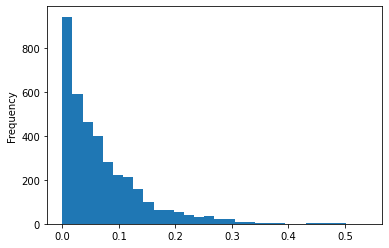

In [30]:
df_tf2_g['bleu1'].plot.hist(bins=30);

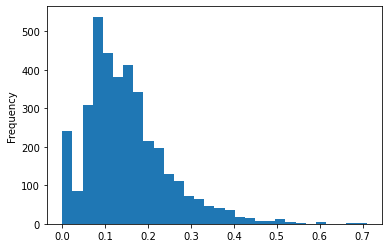

In [31]:
df_tf2_g['rouge-l_f'].plot.hist(bins=30);

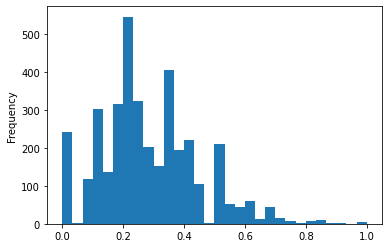

In [32]:
df_tf2_g['rouge-l_p'].plot.hist(bins=30);

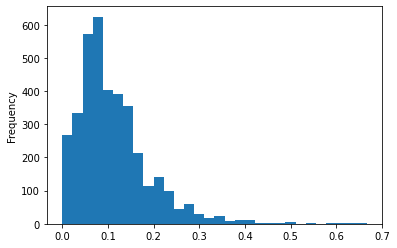

In [33]:
df_tf2_g['rouge-l_r'].plot.hist(bins=30);

In [34]:
df_tf2_g

,Unnamed: 0,index,Unnamed: 0.1,img_id,title,img_url,description,sex,material,price,...,bleu4,rouge-1_f,rouge-1_p,rouge-1_r,rouge-2_f,rouge-2_p,rouge-2_r,rouge-l_f,rouge-l_p,rouge-l_r
0,0,1,1,1,MEN Easy Shorts (Printed),https://d15udtvdbbfasl.cloudfront.net/catalog/...,light and cool shorts are perfect for relaxing...,MEN,100% Cotton,19.9,...,0.000637,0.111111,0.333333,0.066667,0.0,0.0,0.0,0.058824,0.166667,0.035714
1,1,5,6,6,MEN Stretch Slim Fit Shorts (Pattern),https://d15udtvdbbfasl.cloudfront.net/catalog/...,chic shorts with clean lines and a sleek cut w...,MEN,"98% Cotton, 2% Spandex",29.9,...,0.002784,0.185185,0.555556,0.111111,0.0,0.0,0.0,0.127660,0.333333,0.078947
2,2,13,15,15,MEN Easy Shorts (Jersey),https://d15udtvdbbfasl.cloudfront.net/catalog/...,these relaxed pants are soft and comfortable s...,MEN,"67% Cotton, 27% Polyester, 6% Spandex",14.9,...,0.011065,0.125000,0.142857,0.111111,0.0,0.0,0.0,0.129032,0.142857,0.117647
3,3,16,18,18,MEN Dry Stretch Easy Shorts,https://d15udtvdbbfasl.cloudfront.net/catalog/...,comfortable versatile shorts perfect for weari...,MEN,"67% Cotton, 33% Polyester",19.9,...,0.001645,0.060606,0.142857,0.038462,0.0,0.0,0.0,0.062500,0.142857,0.040000
4,4,22,25,25,MEN Ultra Stretch Active Shorts,https://d15udtvdbbfasl.cloudfront.net/catalog/...,incredible functionality and stylish design si...,MEN,100% Polyester,29.9,...,0.003826,0.064516,0.166667,0.040000,0.0,0.0,0.0,0.075472,0.181818,0.047619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3731,3731,18662,33306,34569,Slim Crew Neck Tee,https://storage.sg.content-cdn.io/cdn-cgi/imag...,cut with a slim fit for a flattering silhouett...,WOMEN,NaN,29.9,...,0.012464,0.160000,0.200000,0.133333,0.0,0.0,0.0,0.083333,0.100000,0.071429
3732,3732,18672,33324,34587,Levi's Perfect Graphic Tee Shirt,https://storage.sg.content-cdn.io/cdn-cgi/imag...,it is called perfect for a reason features our...,WOMEN,NaN,39.9,...,0.013759,0.095238,0.111111,0.083333,0.0,0.0,0.0,0.095238,0.111111,0.083333
3733,3733,18677,33331,34594,Levi's Diana Crewneck Sweatshirt,https://storage.sg.content-cdn.io/cdn-cgi/imag...,a crewneck sweater with a vintage fit dropped ...,WOMEN,NaN,119.9,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
3734,3734,18678,33334,34597,Levi's Graphic Sport Hoodie,https://storage.sg.content-cdn.io/cdn-cgi/imag...,sportswear style and casual comfort together i...,WOMEN,NaN,99.9,...,0.011863,0.148148,0.181818,0.125000,0.0,0.0,0.0,0.148148,0.181818,0.125000
